# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key + "&q="
x = cities[0]
query_url = url + x
query_url
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(f"The first response is {json.dumps(weather_json, indent=2)}.")

The first response is {
  "coord": {
    "lon": -135.0107,
    "lat": 68.2191
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": -29.95,
    "feels_like": -35.27,
    "temp_min": -31,
    "temp_max": -29,
    "pressure": 1026,
    "humidity": 76
  },
  "visibility": 3696,
  "wind": {
    "speed": 2.06,
    "deg": 80
  },
  "clouds": {
    "all": 99
  },
  "dt": 1611806686,
  "sys": {
    "type": 1,
    "id": 1029,
    "country": "CA",
    "sunrise": 1611772819,
    "sunset": 1611791114
  },
  "timezone": -25200,
  "id": 5882953,
  "name": "Aklavik",
  "cod": 200
}.


In [25]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key + "&q="
print("Beginning Data Retrieval")
#temps = []
lat = []
lng = []
mtemps = []
humid = []
cloud = []
wspeed = []
country = []
dates = []
x = 0
for n in cities:
    query_url = url + n
    #print(f"{query_url}")
    x = x+1
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #temps.append(weather_json)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        mtemps.append(weather_json['main']['temp_max'])
        humid.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dates.append(weather_json['dt'])
        #lat.append(response['coord']['lat'])
        #temp.append(response['main']['temp'])
        #temperature = weather_json["main"]["temp"]
        # Get the temperature from the response
        print(f"Processing Record {x} |  {n}")
    except:
        lat.append(0)
        lng.append(0)
        mtemps.append(0)
        humid.append(0)
        cloud.append(0)
        wspeed.append(0)
        country.append(0)
        dates.append(0)
        print(f"No data found for {n}")

Beginning Data Retrieval
Processing Record 1 |  aklavik
Processing Record 2 |  ushuaia
Processing Record 3 |  tiksi
Processing Record 4 |  gamba
Processing Record 5 |  port elizabeth
Processing Record 6 |  tanout
Processing Record 7 |  tezu
Processing Record 8 |  arraial do cabo
Processing Record 9 |  barrow
Processing Record 10 |  jamestown
Processing Record 11 |  bac lieu
Processing Record 12 |  norman wells
Processing Record 13 |  airai
Processing Record 14 |  saint joseph
Processing Record 15 |  kodiak
Processing Record 16 |  qaanaaq
No data found for ghimpati
Processing Record 18 |  sur
Processing Record 19 |  punta arenas
Processing Record 20 |  waingapu
Processing Record 21 |  castro
Processing Record 22 |  linqiong
Processing Record 23 |  curitiba
Processing Record 24 |  sitka
Processing Record 25 |  rikitea
Processing Record 26 |  sangar
Processing Record 27 |  vanavara
Processing Record 28 |  beringovskiy
Processing Record 29 |  waddan
Processing Record 30 |  longyearbyen
Pro

Processing Record 247 |  kismayo
Processing Record 248 |  chengde
Processing Record 249 |  moissala
Processing Record 250 |  makakilo city
Processing Record 251 |  kysyl-syr
Processing Record 252 |  ila
Processing Record 253 |  the valley
Processing Record 254 |  ishigaki
Processing Record 255 |  saint-georges
Processing Record 256 |  nanortalik
Processing Record 257 |  thunder bay
Processing Record 258 |  sibolga
Processing Record 259 |  hobyo
No data found for nizhneyansk
Processing Record 261 |  changtu
Processing Record 262 |  ndjole
Processing Record 263 |  neepawa
Processing Record 264 |  aswan
Processing Record 265 |  gucheng
No data found for ondorhaan
No data found for vallee-jonction
Processing Record 268 |  nemuro
Processing Record 269 |  athabasca
Processing Record 270 |  aykhal
Processing Record 271 |  ronneby
Processing Record 272 |  mielec
Processing Record 273 |  marzuq
Processing Record 274 |  hasaki
Processing Record 275 |  kalmunai
Processing Record 276 |  padang
Pro

Processing Record 489 |  gisborne
Processing Record 490 |  marsa matruh
Processing Record 491 |  pestravka
Processing Record 492 |  isakly
Processing Record 493 |  tadine
Processing Record 494 |  grindavik
Processing Record 495 |  wajir
Processing Record 496 |  mindelo
Processing Record 497 |  hays
Processing Record 498 |  presidente medici
Processing Record 499 |  mont-de-marsan
Processing Record 500 |  malaryta
Processing Record 501 |  faya
Processing Record 502 |  upata
Processing Record 503 |  krzeszowice
Processing Record 504 |  ilulissat
Processing Record 505 |  luangwa
Processing Record 506 |  sargur
Processing Record 507 |  karpathos
Processing Record 508 |  yanam
Processing Record 509 |  braganca
Processing Record 510 |  cabinda
Processing Record 511 |  palmer
Processing Record 512 |  canutama
Processing Record 513 |  tabou
Processing Record 514 |  alice springs
Processing Record 515 |  kavieng
Processing Record 516 |  kodinsk
Processing Record 517 |  isla mujeres
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": mtemps,
    "Humidity": humid,
    "Cloudiness": cloud,
    'Wind Speed': wspeed,
    "Country": country,
    "Date": dates
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,-29.00,76,99,3.09,CA,1611808423
1,ushuaia,-54.8000,-68.3000,5.00,70,40,3.60,AR,1611808151
2,tiksi,71.6872,128.8694,-35.14,84,100,1.46,RU,1611808423
3,gamba,-2.6500,10.0000,23.78,90,100,1.35,GA,1611808423
4,port elizabeth,-33.9180,25.5701,14.00,88,0,2.06,ZA,1611808423


In [32]:
weather_data.iloc[16,:]

City          ghimpati
Lat                  0
Lng                  0
Max Temp             0
Humidity             0
Cloudiness           0
Wind Speed           0
Country              0
Date                 0
Name: 16, dtype: object

In [50]:
cleaned_weather_df = weather_data.loc[weather_data['Date'] != 0]
cleaned_weather_df['City'].count()

551

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
clean_city_data = cleaned_weather_df.loc[cleaned_weather_df['Humidity'] <= 100]
#clean_city_data['City'].count()
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,-29.00,76,99,3.09,CA,1611808423
1,ushuaia,-54.8000,-68.3000,5.00,70,40,3.60,AR,1611808151
2,tiksi,71.6872,128.8694,-35.14,84,100,1.46,RU,1611808423
3,gamba,-2.6500,10.0000,23.78,90,100,1.35,GA,1611808423
4,port elizabeth,-33.9180,25.5701,14.00,88,0,2.06,ZA,1611808423


In [52]:
#  Get the indices of cities that have humidity over 100%.
cleaned_weather_df.loc[cleaned_weather_df['Humidity'] > 100].index.values.tolist()


[]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

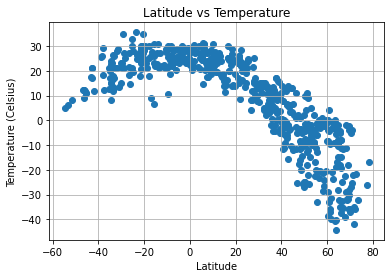

In [53]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
#plt.show()

## Latitude vs. Humidity Plot

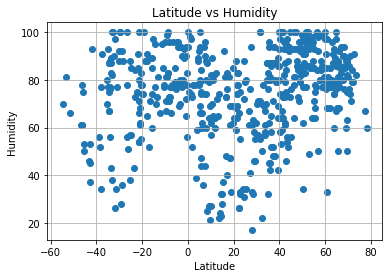

In [55]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
#plt.show()

## Latitude vs. Cloudiness Plot

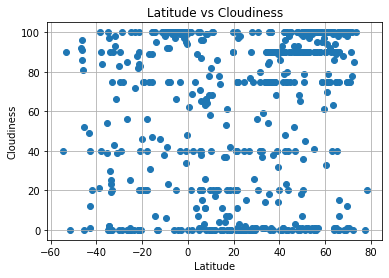

In [57]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
#plt.show()

## Latitude vs. Wind Speed Plot

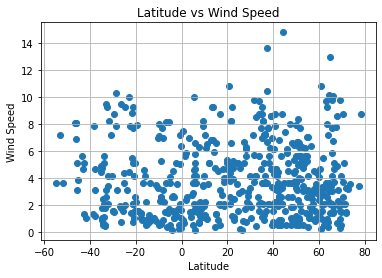

In [58]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
#plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression